In [270]:
import pandas as pd
#importing transactions data and since BARCODE has leading zeroes converted to string
transaction_data = pd.read_csv("TRANSACTION_TAKEHOME.csv", dtype={'BARCODE': str})
#displaying first 5 rows
transaction_data.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,015300014978,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,078742229751,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,047900501183,1.00,


In [271]:
#Getting information about the data
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RECEIPT_ID      50000 non-null  object
 1   PURCHASE_DATE   50000 non-null  object
 2   SCAN_DATE       50000 non-null  object
 3   STORE_NAME      50000 non-null  object
 4   USER_ID         50000 non-null  object
 5   BARCODE         44238 non-null  object
 6   FINAL_QUANTITY  50000 non-null  object
 7   FINAL_SALE      50000 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [272]:
#Getting count of nulls in the tansactions data
transaction_data.isna().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

In [273]:
#number of unique values in the transaction data
transaction_data.nunique()

RECEIPT_ID        24440
PURCHASE_DATE        89
SCAN_DATE         24440
STORE_NAME          954
USER_ID           17694
BARCODE           11028
FINAL_QUANTITY       87
FINAL_SALE         1435
dtype: int64

In [274]:
# Converting BARCODE to string and replacing null values with "NA"
transaction_data['BARCODE'] = transaction_data['BARCODE'].fillna("NA")

In [275]:
# Convert FINAL_QUANTITY to Float, replacing "zero" with 0 and handling non-numeric values
transaction_data['FINAL_QUANTITY'] = transaction_data['FINAL_QUANTITY'].replace('zero', 0)
transaction_data['FINAL_QUANTITY'] = pd.to_numeric(transaction_data['FINAL_QUANTITY'], errors='coerce').fillna(0).astype(float)

# Convert FINAL_SALE to Float, handling nulls 
transaction_data['FINAL_SALE'] = pd.to_numeric(transaction_data['FINAL_SALE'], errors='coerce').fillna(0).astype(float)
# Convert SCAN_DATE to datetime format
transaction_data['SCAN_DATE'] = pd.to_datetime(transaction_data['SCAN_DATE'], errors='coerce')
transaction_data['SCAN_DATE'] = transaction_data['SCAN_DATE'].dt.strftime('%Y-%m-%d %H:%M:%S')



In [276]:
transaction_data.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06,WALMART,63b73a7f3d310dceeabd4758,015300014978,1.0,0.00
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24,ALDI,62c08877baa38d1a1f6c211a,NA,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56,WALMART,60842f207ac8b7729e472020,078742229751,1.0,0.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43,RANDALLS,6193231ae9b3d75037b0f928,047900501183,1.0,0.00


In [277]:
# Count of null values after handling the data
transaction_data.isna().sum()

RECEIPT_ID        0
PURCHASE_DATE     0
SCAN_DATE         0
STORE_NAME        0
USER_ID           0
BARCODE           0
FINAL_QUANTITY    0
FINAL_SALE        0
dtype: int64

In [278]:
#count of duplicate values
transaction_data.duplicated().sum()

335

In [279]:
#removing the duplicate values
transaction_data = transaction_data[~transaction_data.duplicated()]

In [280]:
#count of duplicates after hanling duplicate values
transaction_data.duplicated().sum()

0

In [281]:
#converting PURCHASE_DATE AND SCAN_DATE to DATETIME FORMAT
transaction_data['PURCHASE_DATE'] = pd.to_datetime(transaction_data['PURCHASE_DATE'])
transaction_data['SCAN_DATE'] = pd.to_datetime(transaction_data['SCAN_DATE'])

In [282]:
#There are some rows with the same RECEIPT_ID and BARCODE, where either FINAL_SALE or FINAL_QUANTITY is zero. In such cases,
#there are duplicate rows with the same RECEIPT_ID, BARCODE, STORE_NAME, and USER_ID, where the other row contains the correct values.
transaction_data = transaction_data[(transaction_data['FINAL_SALE'] != 0) & (transaction_data['FINAL_QUANTITY'] != 0)]

In [284]:
#Finding the transations with scan date before the purchase date 
filtered_df = transaction_data[transaction_data['SCAN_DATE'] < transaction_data['PURCHASE_DATE']]

# Display the filtered DataFrame
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 25262 to 47837
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      47 non-null     object        
 1   PURCHASE_DATE   47 non-null     datetime64[ns]
 2   SCAN_DATE       47 non-null     datetime64[ns]
 3   STORE_NAME      47 non-null     object        
 4   USER_ID         47 non-null     object        
 5   BARCODE         47 non-null     object        
 6   FINAL_QUANTITY  47 non-null     float64       
 7   FINAL_SALE      47 non-null     float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 3.3+ KB


In [285]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24538 entries, 25000 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      24538 non-null  object        
 1   PURCHASE_DATE   24538 non-null  datetime64[ns]
 2   SCAN_DATE       24538 non-null  datetime64[ns]
 3   STORE_NAME      24538 non-null  object        
 4   USER_ID         24538 non-null  object        
 5   BARCODE         24538 non-null  object        
 6   FINAL_QUANTITY  24538 non-null  float64       
 7   FINAL_SALE      24538 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 1.7+ MB


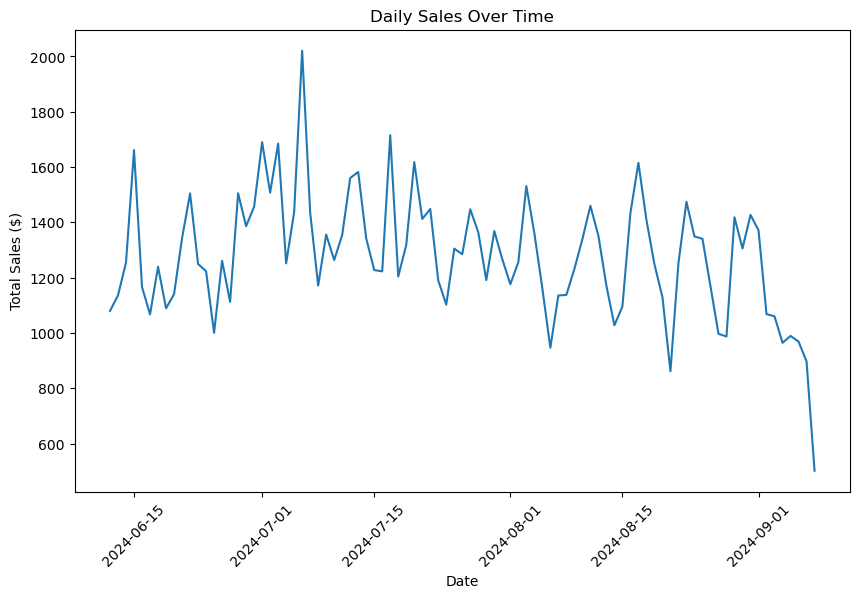

In [286]:
#Plot to get Daily sales over time
import matplotlib.pyplot as plt

# Aggregate sales by purchase date
daily_sales = transaction_data.groupby('PURCHASE_DATE')['FINAL_SALE'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['PURCHASE_DATE'], daily_sales['FINAL_SALE'])
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.title('Daily Sales Over Time')
plt.xticks(rotation=45)
plt.show()


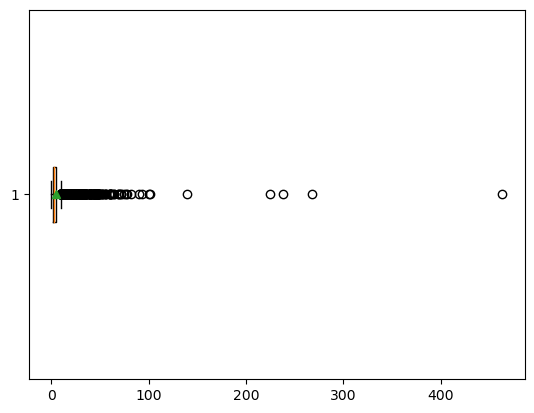

In [287]:
#Distribution of FINAl_SALE values shown by box plot
plt.boxplot(transaction_data['FINAL_SALE'], vert=False, showmeans=True)
plt.show()

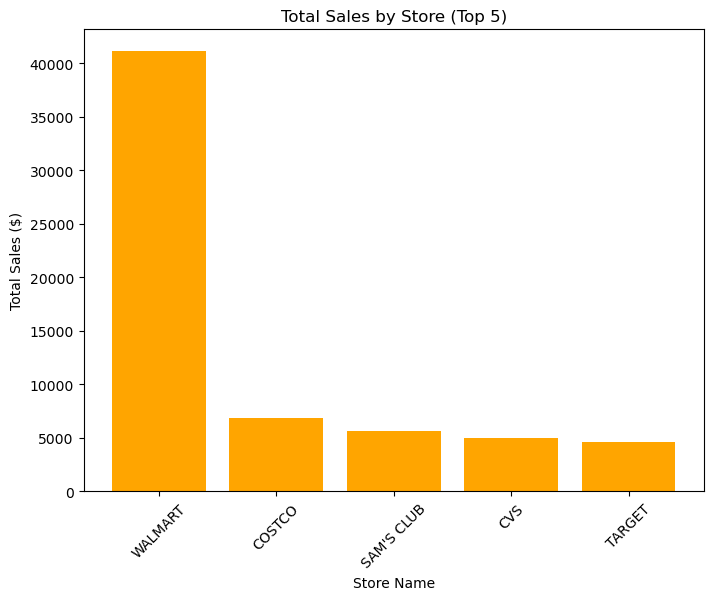

In [288]:
# Plot for top 5 stores by sales.
# Group by STORE_NAME and calculate total sales
store_sales = transaction_data.groupby('STORE_NAME')['FINAL_SALE'].sum().reset_index()

# Sort the DataFrame by FINAL_SALE in descending order and select the top 5
top_stores = store_sales.sort_values(by='FINAL_SALE', ascending=False).head(5)

# Plot the top 5 stores
plt.figure(figsize=(8, 6))
plt.bar(top_stores['STORE_NAME'], top_stores['FINAL_SALE'], color='orange')
plt.xlabel('Store Name')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Store (Top 5)')
plt.xticks(rotation=45)
plt.show()


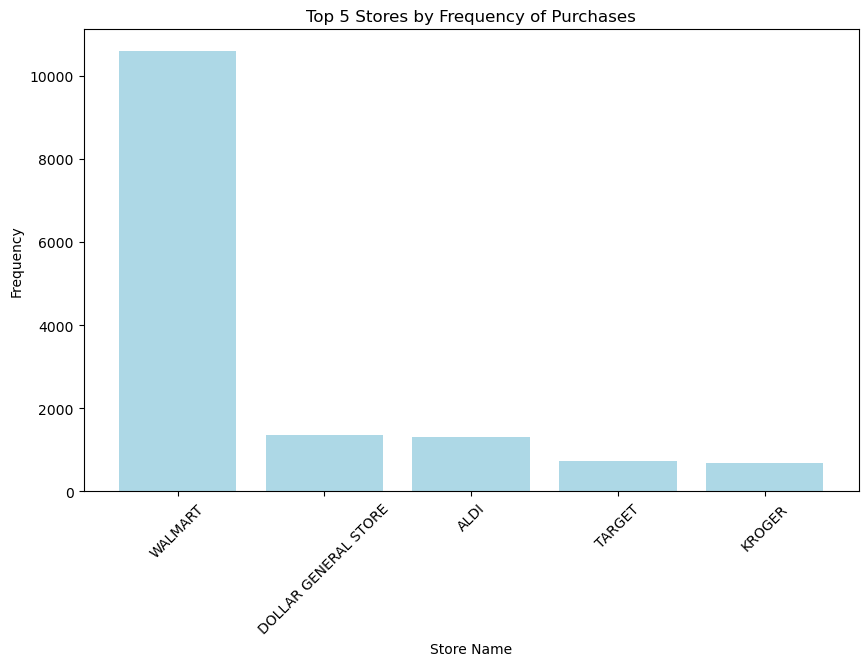

In [289]:
#Plot for top 5 stores by frequency of visits.
category_counts = transaction_data['STORE_NAME'].value_counts()

# Get the top 5 stores
top_5_stores = category_counts.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_stores.index, top_5_stores.values, color='lightblue')
plt.xlabel('Store Name')
plt.ylabel('Frequency')
plt.title('Top 5 Stores by Frequency of Purchases')
plt.xticks(rotation=45)
plt.show()

In [290]:
#importing user_takehome data
user_data = pd.read_csv('USER_TAKEHOME.csv')
user_data.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [291]:
#Count of null values in users data
user_data.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [292]:
user_data.isnull().mean() * 100

ID               0.000
CREATED_DATE     0.000
BIRTH_DATE       3.675
STATE            4.812
LANGUAGE        30.508
GENDER           5.892
dtype: float64

In [293]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [294]:
# Converting CREATED_DATE and BIRTH_DATE to DATETIME format
user_data["CREATED_DATE"] = pd.to_datetime(user_data["CREATED_DATE"], errors='coerce')
user_data["BIRTH_DATE"] = pd.to_datetime(user_data["BIRTH_DATE"], errors='coerce')

In [295]:
#There are no duplicate values in users data 
user_data.duplicated().sum()

0

In [296]:
#Handling null values by replacing NAN with unknown in GENDER, NA in LANGUAGE and NA in STATE
user_data["GENDER"].fillna("NA", inplace=True)
user_data["LANGUAGE"].fillna("NA", inplace=True)
user_data["STATE"].fillna("NA", inplace=True)

In [297]:
#Handle null values in the BIRTH_DATE column by replacing them with random values from the same column, ensuring the distribution remains consistent
import numpy as np
existing_birth_dates = user_data["BIRTH_DATE"].dropna()
user_data["BIRTH_DATE"].fillna(pd.Series(np.random.choice(existing_birth_dates, size=user_data["BIRTH_DATE"].isnull().sum())), inplace=True)

In [298]:
birth_date_counts = user_data['BIRTH_DATE'].value_counts()

# Filter for birth dates that are repeated (more than once)
repeated_birth_dates = birth_date_counts[birth_date_counts > 1]

# Display the repeated birth dates and their counts
print("repeated Birth Dates:")
print(repeated_birth_dates)

repeated Birth Dates:
1970-01-01 00:00:00+00:00    1274
1979-12-11 08:00:00+00:00      63
2000-12-12 00:00:00+00:00      29
2000-12-31 00:00:00+00:00      23
2001-01-01 00:00:00+00:00      16
                             ... 
1986-10-22 04:00:00+00:00       2
1974-03-19 00:00:00+00:00       2
1973-08-03 05:00:00+00:00       2
1994-11-01 05:00:00+00:00       2
1999-07-05 00:00:00+00:00       2
Name: BIRTH_DATE, Length: 22360, dtype: int64


In [299]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96461 non-null   datetime64[ns, UTC]
 3   STATE         100000 non-null  object             
 4   LANGUAGE      100000 non-null  object             
 5   GENDER        100000 non-null  object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


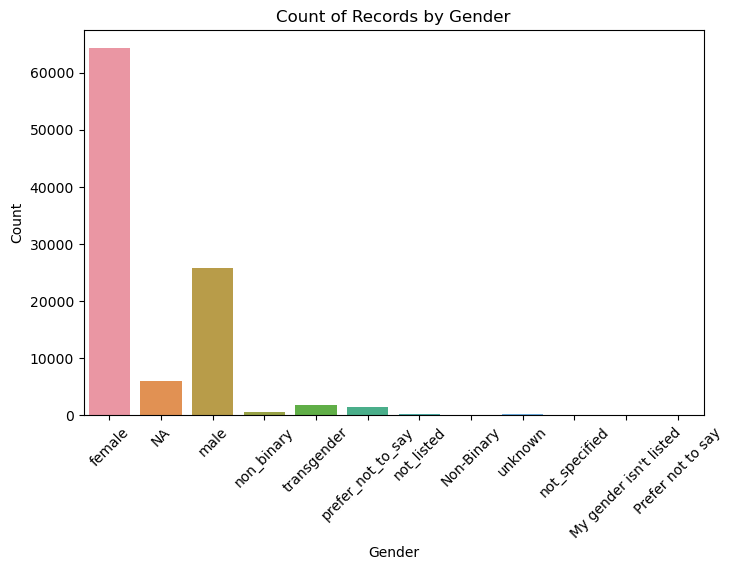

In [300]:
# To visualize the distribution of all genders,created a count plot with seaborn
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=user_data, x='GENDER')
plt.title('Count of Records by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [301]:
#There are some discrepencies in GENDER column. All the genders are not listed properly.So, for analyzing I converted all genderds other than male, female, unknown and prefer not to say to other
gender_mapping = {"prefer_not_to_say": "Prefer not to say","non_binary":"Non-Binary","not_listed":"My gender isn't listed"}
user_data["GENDER"] = user_data["GENDER"].replace(gender_mapping)
#user_data.loc[~user_data["GENDER"].isin(["male", "female", "Unknown", "Prefer not to say"]), "GENDER"] = "Other"

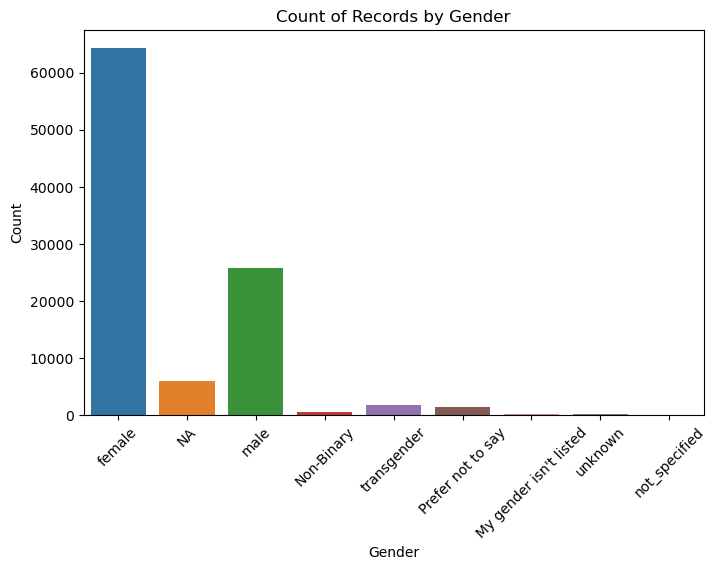

In [302]:
# Plot to see number of users by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=user_data, x='GENDER')
plt.title('Count of Records by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

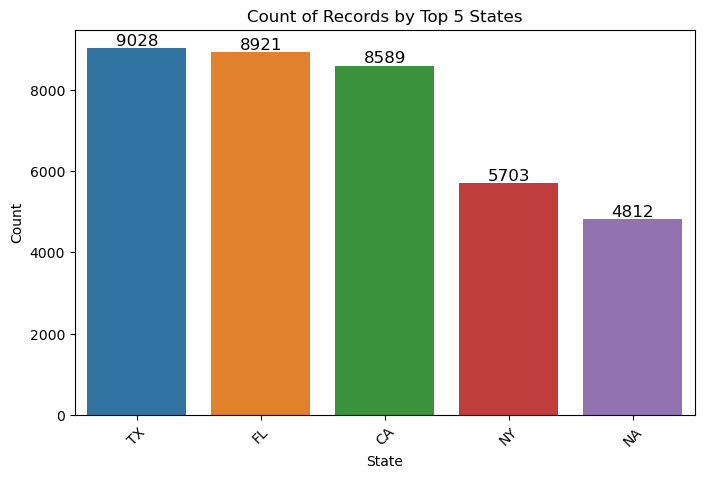

In [303]:
#Plotting top 5 states with highest number of users.
top_states = user_data['STATE'].value_counts().nlargest(5)

# Visualization: Count of Records by Top 5 States
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=user_data[user_data['STATE'].isin(top_states.index)], x='STATE', order=top_states.index)
# Annotate the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title('Count of Records by Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

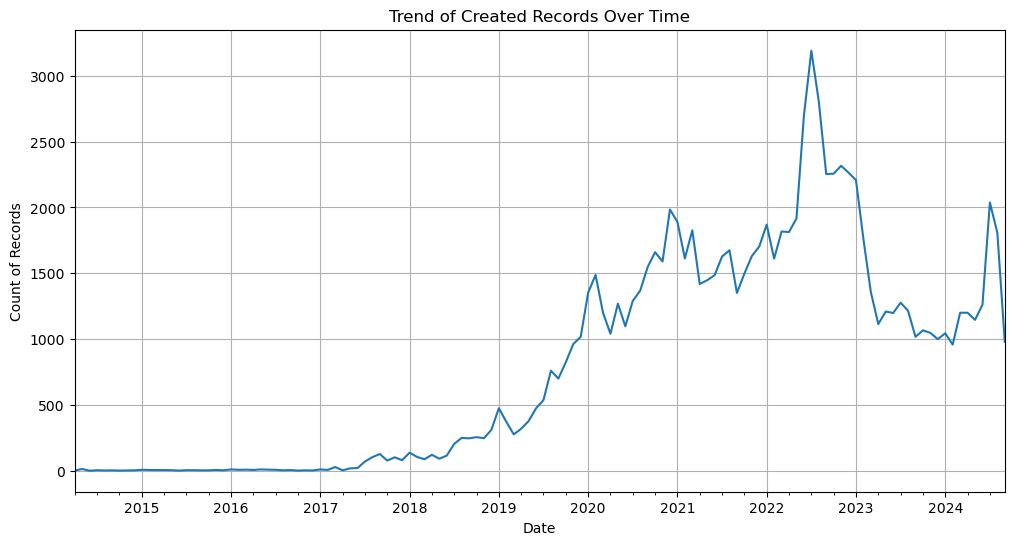

In [304]:
#Plot to see the trend of users cretated over time.
plt.figure(figsize=(12, 6))
user_data.set_index('CREATED_DATE').resample('M').count()['ID'].plot()
plt.title('Trend of Created Records Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Records')
plt.grid()
plt.show()

In [305]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96461 non-null   datetime64[ns, UTC]
 3   STATE         100000 non-null  object             
 4   LANGUAGE      100000 non-null  object             
 5   GENDER        100000 non-null  object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


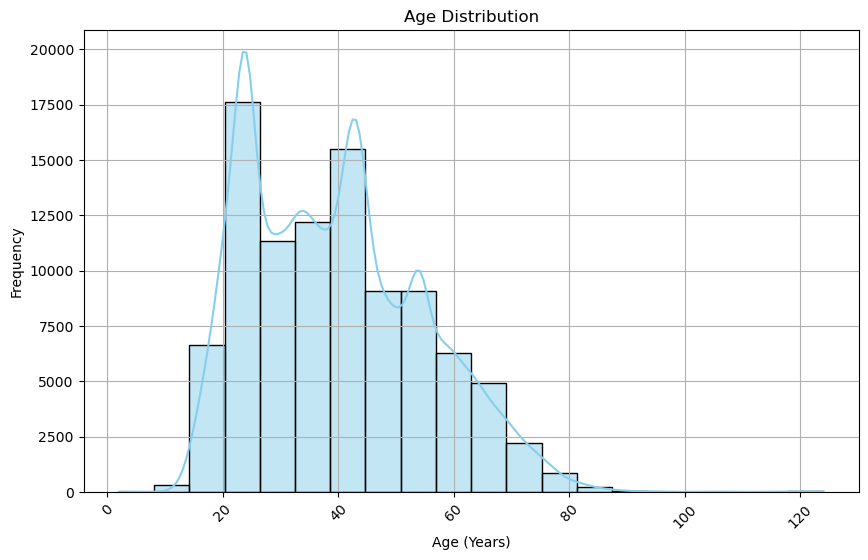

In [306]:
user_data["CREATED_DATE"] = pd.to_datetime(user_data["CREATED_DATE"], errors='coerce').dt.tz_localize(None)
user_data["BIRTH_DATE"] = pd.to_datetime(user_data["BIRTH_DATE"], errors='coerce').dt.tz_localize(None)

# Get the current date and time in UTC without timezone info
current_date = pd.Timestamp.now(tz='UTC').tz_localize(None)

# Calculate the age
user_data["AGE"] = (current_date - user_data["BIRTH_DATE"]).dt.days // 365

# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_data["AGE"], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid()
plt.show()

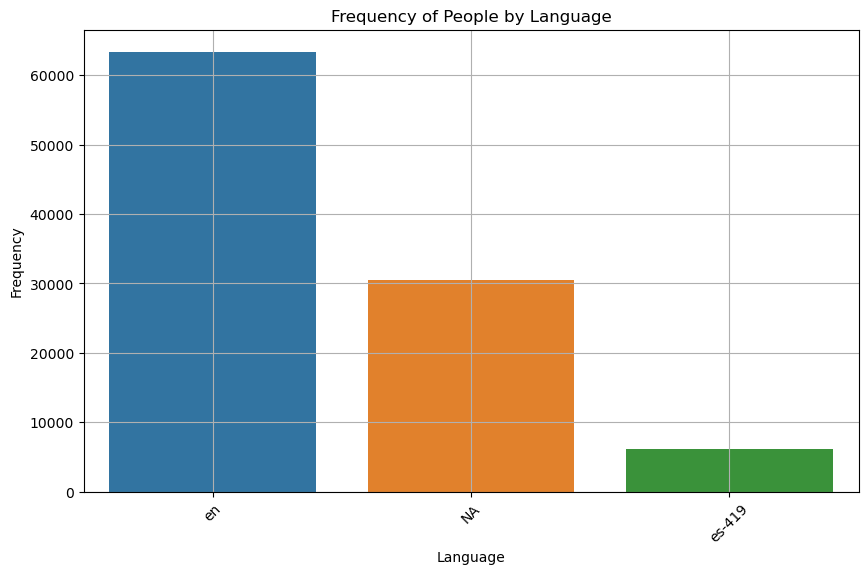

In [307]:
plt.figure(figsize=(10, 6))
sns.countplot(data=user_data, x='LANGUAGE', order=user_data['LANGUAGE'].value_counts().index)
plt.title('Frequency of People by Language')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [308]:
#Importing products_takehome file
product_data = pd.read_csv("PRODUCTS_TAKEHOME.csv", dtype={'BARCODE': str})
product_data.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,023278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,035000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,0806810850459


In [309]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    845441 non-null  object
 1   CATEGORY_2    844128 non-null  object
 2   CATEGORY_3    784986 non-null  object
 3   CATEGORY_4    67459 non-null   object
 4   MANUFACTURER  619078 non-null  object
 5   BRAND         619080 non-null  object
 6   BARCODE       841527 non-null  object
dtypes: object(7)
memory usage: 45.2+ MB


In [310]:
product_data.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [311]:
product_data.isnull().mean()*100

CATEGORY_1       0.013128
CATEGORY_2       0.168411
CATEGORY_3       7.162895
CATEGORY_4      92.021898
MANUFACTURER    26.784160
BRAND           26.783923
BARCODE          0.476020
dtype: float64

In [312]:
missing_barcode = product_data[product_data["BARCODE"].isna()]
# Group by MANUFACTURER and BRAND, then count
missing_barcode_count = (missing_barcode.groupby("MANUFACTURER").size().reset_index(name='Missing Barcode Count').sort_values(by='Missing Barcode Count', ascending=False))
missing_barcode_count

,MANUFACTURER,Missing Barcode Count
29,COTY,269
95,PROCTER & GAMBLE,268
44,GENERAL MILLS,245
90,PEPSICO,210
121,UNILEVER,209
...,...,...
63,KODIAK CAKES,3
109,SONIC,2
67,LIFESCAN,2
11,BEECH-NUT,2


In [313]:
missing_barcode = product_data[product_data["BARCODE"].isna()]
# Group by MANUFACTURER and BRAND, then count
missing_barcode_count = (missing_barcode.groupby(["MANUFACTURER","BRAND"]).size().reset_index(name='Missing Barcode Count').sort_values(by='Missing Barcode Count', ascending=False))
missing_barcode_count

,MANUFACTURER,BRAND,Missing Barcode Count
691,THE COCA-COLA COMPANY,COCA-COLA,26
252,GENERAL MILLS,ANNIE'S HOMEGROWN GROCERY,24
741,UNILEVER,DOVE,23
249,GALLO,BAREFOOT,23
386,KAO USA,ORIBE,21
...,...,...,...
729,THE JM SMUCKER COMPANY,SMUCKER'S,1
626,PROCTER & GAMBLE,ZZZQUIL,1
426,KRAFTHEINZ,KRAFT,1
518,NESTLE,GERBER BABY FOOD,1


In [314]:
#Dropping rows with missing barcodes
product_data = product_data.dropna(subset=['BARCODE'])

In [315]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841527 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    841416 non-null  object
 1   CATEGORY_2    840866 non-null  object
 2   CATEGORY_3    782813 non-null  object
 3   CATEGORY_4    67236 non-null   object
 4   MANUFACTURER  615300 non-null  object
 5   BRAND         615302 non-null  object
 6   BARCODE       841527 non-null  object
dtypes: object(7)
memory usage: 51.4+ MB


In [316]:
product_data.duplicated().sum()

0

In [317]:
product_data.nunique()

CATEGORY_1          27
CATEGORY_2         121
CATEGORY_3         341
CATEGORY_4         126
MANUFACTURER      4354
BRAND             8053
BARCODE         841525
dtype: int64

In [318]:
#Different brands having same barcode
duplicate_barcodes = product_data[product_data.duplicated(subset=['BARCODE'], keep=False)]
duplicate_barcodes

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
28421,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,052336919068
213340,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,017000329260
304021,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,017000329260
709607,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,052336919068


In [319]:
filtered_duplicates = duplicate_barcodes.groupby('BARCODE').head(1)
# Remove the extra duplicates from the original data
product_data = pd.concat([filtered_duplicates, product_data[~product_data.index.isin(duplicate_barcodes.index)]])
# Reset index for clean output
product_data.reset_index(drop=True, inplace=True)

              Missing Values (%)
CATEGORY_4             92.010220
MANUFACTURER           26.882980
BRAND                  26.882743
CATEGORY_3              6.977095
CATEGORY_2              0.078548
CATEGORY_1              0.013190


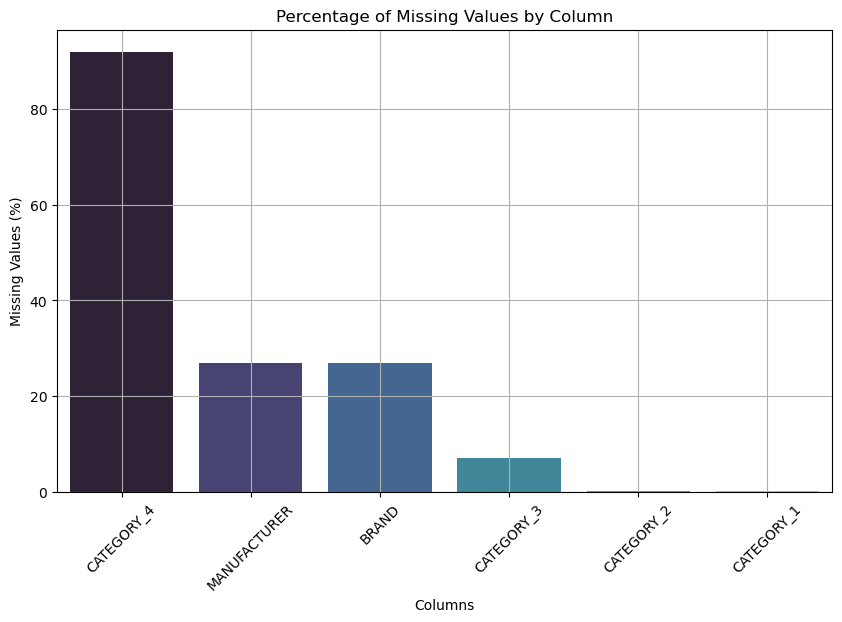

In [320]:
missing_percentage = product_data.isnull().mean() * 100
missing_info = pd.DataFrame({'Missing Values (%)': missing_percentage})
missing_info = missing_info[missing_info['Missing Values (%)'] > 0].sort_values(by='Missing Values (%)', ascending=False)
print(missing_info)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_info.index, y='Missing Values (%)', data=missing_info, palette='mako')
plt.xticks(rotation=45)
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.grid()
plt.show()


In [321]:
# Dropping Category_4 since it has 92% of missing values
product_data = product_data.drop(columns=['CATEGORY_4'])
product_data.fillna('NA', inplace=True)

In [322]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841525 entries, 0 to 841524
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    841525 non-null  object
 1   CATEGORY_2    841525 non-null  object
 2   CATEGORY_3    841525 non-null  object
 3   MANUFACTURER  841525 non-null  object
 4   BRAND         841525 non-null  object
 5   BARCODE       841525 non-null  object
dtypes: object(6)
memory usage: 38.5+ MB


In [323]:
product_data.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Hair Care,Hair Color,HENKEL,SCHWARZKOPF,052336919068
1,Health & Wellness,Hair Care,Hair Color,HENKEL,SCHWARZKOPF,017000329260
2,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NA,NA,796494407820
3,Snacks,Puffed Snacks,Cheese Curls & Puffs,NA,NA,023278011028
4,Health & Wellness,Hair Care,Hair Care Accessories,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225


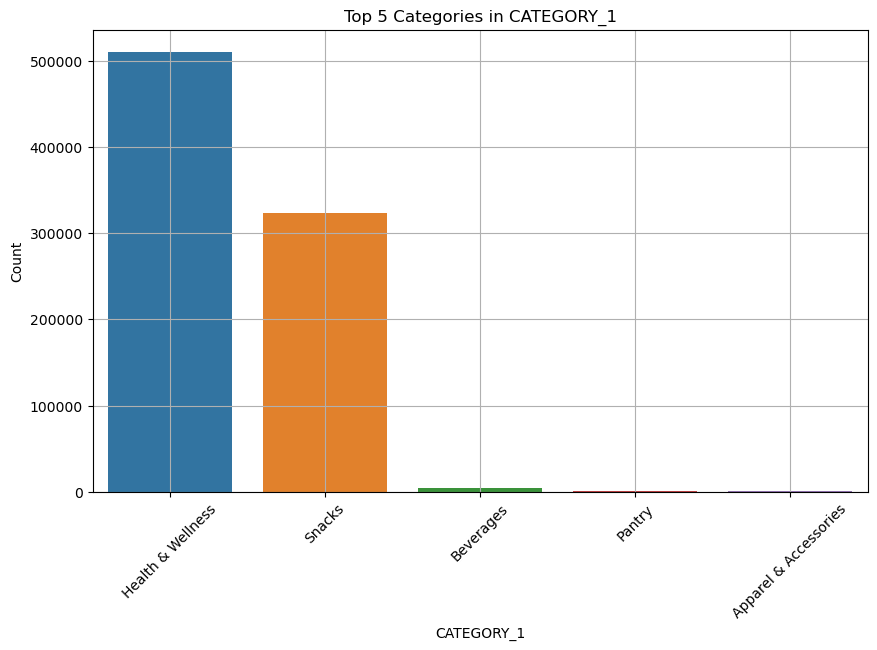

In [324]:
top_category_1 = product_data['CATEGORY_1'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_category_1.index, y=top_category_1.values)
plt.title('Top 5 Categories in CATEGORY_1')
plt.xlabel('CATEGORY_1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

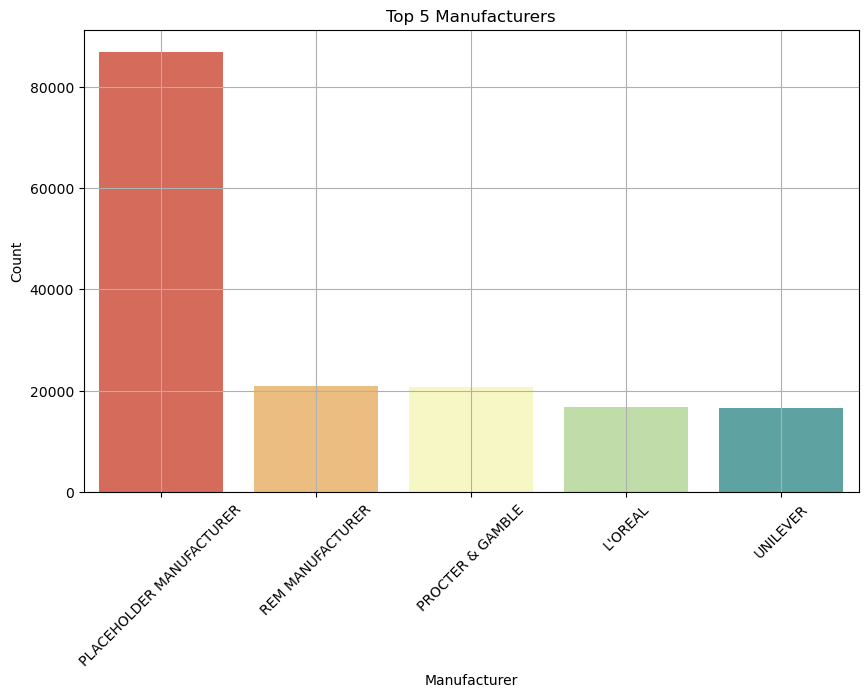

In [325]:
# Top 5 count plot for MANUFACTURER
filtered_data = product_data[product_data['MANUFACTURER'] != 'NA']
top_manufacturers = filtered_data['MANUFACTURER'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette='Spectral')
plt.title('Top 5 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [326]:
user_data.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54,2000-08-11 00:00:00,CA,es-419,female,24.0
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55,2001-09-24 04:00:00,PA,en,female,23.0
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18,1994-10-28 00:00:00,FL,es-419,female,30.0
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22,1969-07-16 00:00:00,NC,en,NA,55.0
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50,1972-03-19 00:00:00,PA,en,female,52.0


In [327]:
product_data.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Hair Care,Hair Color,HENKEL,SCHWARZKOPF,052336919068
1,Health & Wellness,Hair Care,Hair Color,HENKEL,SCHWARZKOPF,017000329260
2,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NA,NA,796494407820
3,Snacks,Puffed Snacks,Cheese Curls & Puffs,NA,NA,023278011028
4,Health & Wellness,Hair Care,Hair Care Accessories,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225


In [328]:
transaction_data.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,2024-08-20,2024-08-20 11:17:29,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,745527114884,1.0,1.65
25001,04869b68-29e3-4e8d-9bdb-950046fc3473,2024-08-05,2024-08-09 16:06:00,DOLLAR GENERAL STORE,654cf234a225ea102b81072e,745527114884,1.0,1.65
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,2024-09-03,2024-09-03 11:28:25,WALMART,63c1cb6d3d310dceeac55487,037000828761,1.0,28.22
25003,7ee1798e-fd2e-4278-838b-f417fdcafe08,2024-08-30,2024-09-04 12:53:31,DOLLAR GENERAL STORE,65c29b137050d0a6206cd24f,012000504051,1.0,5.25
25004,21feab39-49f2-42e9-ae69-10371e2fc0a9,2024-08-23,2024-08-27 10:45:00,TARGET,61a58ac49c135b462ccddd1c,024000393429,1.0,2.59


In [329]:
!pip install pandasql
import pandas as pd
import pandasql as ps

In [330]:
#What are the top 5 brands by receipts scanned among users 21 and over?
query_1 = """
SELECT p.BRAND, COUNT(t.RECEIPT_ID) AS receipt_count
FROM transaction_data t
JOIN user_data u ON t.USER_ID = u.ID
JOIN product_data p ON t.BARCODE = p.BARCODE
WHERE u.AGE >= 21 and p.BRAND!= 'NA'
GROUP BY p.BRAND
ORDER BY receipt_count DESC
LIMIT 5;
"""

top_brands_receipts = ps.sqldf(query_1)
top_brands_receipts


,BRAND,receipt_count
0,NERDS CANDY,3
1,DOVE,3
2,TRIDENT,2
3,SOUR PATCH KIDS,2
4,MEIJER,2


In [331]:
#What are the top 5 brands by sales among users that have had their account for at least six months?
query_2 = """
SELECT p.BRAND, SUM(t.FINAL_SALE) AS total_sales
FROM transaction_data t
JOIN user_data u ON t.USER_ID = u.ID
JOIN product_data p ON t.BARCODE = p.BARCODE
WHERE u.CREATED_DATE <= DATE('now', '-6 months') and p.BRAND!='NA'
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 5;
"""

top_brands_sales = ps.sqldf(query_2)
top_brands_sales


,BRAND,total_sales
0,CVS,72.00
1,DOVE,30.91
2,TRIDENT,23.36
3,COORS LIGHT,17.48
4,TRESEMMÉ,14.58


In [332]:
#Who are Fetch’s power users?
query_4 = """
SELECT t.USER_ID, COUNT(t.RECEIPT_ID) AS transaction_count
FROM transaction_data t
GROUP BY t.USER_ID
ORDER BY transaction_count DESC
LIMIT 5;
"""

power_users = ps.sqldf(query_4)
power_users


,USER_ID,transaction_count
0,64e62de5ca929250373e6cf5,11
1,62925c1be942f00613f7365e,10
2,604278958fe03212b47e657b,10
3,64063c8880552327897186a5,9
4,6327a07aca87b39d76e03864,7


In [333]:
#Which is the leading brand in the Dips & Salsa category?
query_5 = """
SELECT p.BRAND, SUM(t.FINAL_SALE) AS total_sales
FROM transaction_data t
JOIN product_data p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa'
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 1;
"""

leading_brand_dips_salsa = ps.sqldf(query_5)

leading_brand_dips_salsa

,BRAND,total_sales
0,TOSTITOS,181.3


In [334]:
#At what percent has Fetch grown year over year?
user_growth = """WITH yearly_users AS (
    SELECT strftime('%Y', CREATED_DATE) AS year,COUNT(ID) AS total_users
    FROM user_data
    GROUP BY year
)
SELECT current.year,current.total_users,COALESCE(previous.total_users, 0) AS previous_year_users,
    CASE WHEN previous.total_users IS NULL THEN NULL
        ELSE ((current.total_users - previous.total_users) * 1.0 / previous.total_users) * 100
    END AS growth_percentage
FROM yearly_users current
LEFT JOIN yearly_users previous ON current.year = strftime('%Y', date(previous.year || '-01-01', '+1 year'))
ORDER BY current.year;"""

# Execute the SQL query
yearly_user = ps.sqldf(user_growth, locals())
yearly_user


,year,total_users,previous_year_users,growth_percentage
0,2014,30,0,NaN
1,2015,51,30,70.000000
2,2016,70,51,37.254902
3,2017,644,70,820.000000
4,2018,2168,644,236.645963
5,2019,7093,2168,227.167897
6,2020,16883,7093,138.023403
7,2021,19159,16883,13.481016
8,2022,26807,19159,39.918576
9,2023,15464,26807,-42.313575


In [335]:
yearly_users

,year,total_users
0,2014,30
1,2015,51
2,2016,70
3,2017,644
4,2018,2168
5,2019,7093
6,2020,16883
7,2021,19159
8,2022,26807
9,2023,15464
